In [0]:
import json
import keras
from sklearn.model_selection import train_test_split 

json_file = open('Team5_Microsoft.json')
json_str = json_file.read()
data = json.loads(json_str)

X_raw = list(data['text'].values())
y_raw = list(data['sentiment'].values())
y = keras.utils.to_categorical(y_raw, 3)

Using TensorFlow backend.


In [0]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X_raw)

print(X.toarray())

[[0 0 0 ... 2 1 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 2 2 0]]


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [0]:
from keras.models import Sequential
from keras.layers import  Flatten, Dense

model = Sequential()
model.add(Dense(256, activation='relu', input_dim = 1646))
model.add(Dense(3, activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               421632    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 771       
Total params: 422,403
Trainable params: 422,403
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=2e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(X,
                    y,
                    epochs=10,
                    batch_size=32,
                    validation_split = 0.2)

Instructions for updating:
Use tf.cast instead.
Train on 142 samples, validate on 36 samples
Epoch 1/10
142/142 [==============================] - 1s 6ms/step - loss: 0.9371 - acc: 0.6056 - val_loss: 1.2221 - val_acc: 0.3889
Epoch 2/10
142/142 [==============================] - 0s 311us/step - loss: 0.6883 - acc: 0.7817 - val_loss: 1.2323 - val_acc: 0.3889
Epoch 3/10
142/142 [==============================] - 0s 220us/step - loss: 0.5848 - acc: 0.8169 - val_loss: 1.2518 - val_acc: 0.4167
Epoch 4/10
142/142 [==============================] - 0s 229us/step - loss: 0.5135 - acc: 0.8380 - val_loss: 1.2334 - val_acc: 0.4167
Epoch 5/10
142/142 [==============================] - 0s 219us/step - loss: 0.4570 - acc: 0.8592 - val_loss: 1.2442 - val_acc: 0.4167
Epoch 6/10
142/142 [==============================] - 0s 242us/step - loss: 0.4107 - acc: 0.8803 - val_loss: 1.2335 - val_acc: 0.4167
Epoch 7/10
142/142 [==============================] - 0s 232us/step - loss: 0.3700 - acc: 0.9085 - val_lo

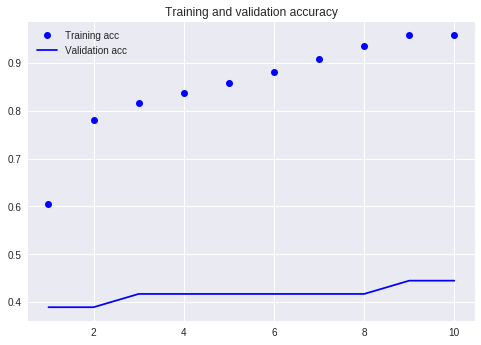

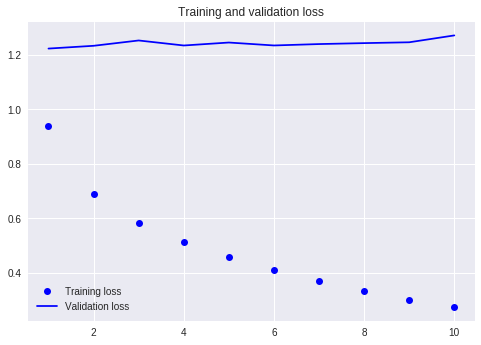

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<Figure size 576x396 with 0 Axes>

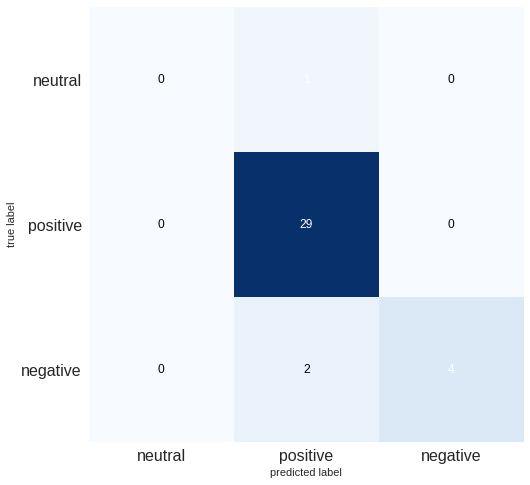

In [0]:
import numpy as np
preds = model.predict(X_test)
preds = np.argmax(preds, axis = -1)

y_test_cm = np.argmax(y_test, axis = -1)

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test_cm, preds)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(3), ['neutral', 'positive', 'negative'], fontsize=16)
plt.yticks(range(3), ['neutral', 'positive', 'negative'], fontsize=16)
plt.show()

In [0]:
print(preds.shape)
print(preds)
print(y_test.shape)
print(y_test)

(36,)
[1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 2 1 1 1 1 1]
(36, 3)
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
